In [1]:
import pandas as pd

In [3]:
titles = pd.read_csv('titles.csv')

In [33]:
titles

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015
...,...,...
210586,Hu tu nu si ji,1982
210587,Le mouton noir,1922
210588,Edge of the Unknown,2015
210589,E yue,2005


In [7]:
cast = pd.read_csv('cast.csv')

In [34]:
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
1048570,Brown Soup Thing,2008,Paul P.K. Kim,actor,Joey's Friend PK,22.0
1048571,The Social Network,2010,Paul S. Kim,actor,Rob,NaN
1048572,The Long Lunch,2003,Pauly Kim,actor,Karaoke Star,32.0
1048573,Mr. Saturday Night,1992,Peter Kim,actor,Maitre d',35.0


In [9]:
# Using groupby(), plot the number of films that have been released each decade in the history of cinema.

t = titles

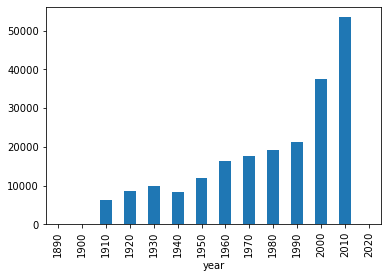

In [10]:
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [11]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles

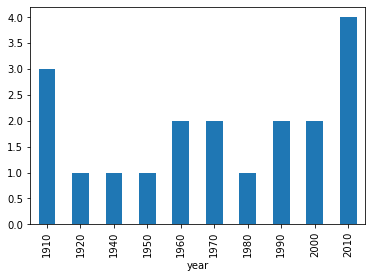

In [12]:
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [13]:
# How many leading (n=1) roles were available to actors,and how many to actresses, in each year of the 1950s?

c = cast

In [14]:
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type 
1950  actor    290
1951  actor    308
1952  actor    265
1953  actor    305
1954  actor    296
1955  actor    289
1956  actor    267
1957  actor    348
1958  actor    346
1959  actor    317
dtype: int64

In [15]:
# In the 1950s decade taken as a whole,how many total roles were available to actors,and how many to actresses, for each "n" number 1 through 5?

c = cast

In [16]:
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type 
1.0  actor    3031
2.0  actor    2190
3.0  actor    2595
4.0  actor    2596
5.0  actor    2656
dtype: int64

In [17]:
# Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

c = cast

In [18]:
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,11.0
2006,50.0


In [35]:
# List, in order by year, each of the films in which Frank Oz has played more than 1 role.

c = cast

In [36]:
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

Series([], dtype: int64)

In [37]:
# List each of the characters that Frank Oz has portrayed at least twice.

c = cast

In [44]:
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].order()

AttributeError: 'Series' object has no attribute 'order'